In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
drive_undergraduate_work_path = '/content/drive/My Drive/учеба/дипломная работа/colab_dir/aws/'

In [0]:
def read_scores(model_name, start_step=0, end_step=int(1e10)):
  path = drive_undergraduate_work_path + model_name
  df = pd.read_csv(path, sep='\t', header=0)
  test_df = df[df.category.eq('TEST')] 
  train_df = df[df.category.eq('TRAIN')]

  test_df = test_df[start_step <= df.step]
  test_df = test_df[df.step <= end_step]

  train_df = train_df[start_step <= df.step]
  train_df = train_df[df.step <= end_step]

  return test_df, train_df

In [0]:
def draw_plt(train_scores, test_scores, model_names, \
             metrics=['cross_entropy', 'mean_anlp', 'common_loss', 'mean_auc']):

  fig, ax = plot.subplots(len(metrics), len(model_names))
  fig.set_figheight(30)
  fig.set_figwidth(10)

  for i, metric in enumerate(metrics):
    for j in range(len(test_scores)):
      model_name = model_names[j]
      ax[i][j].set_xlabel('step')
      ax[i][j].set_title('[%s model] %s' % (model_name, metric))

      ax[i][j].plot(test_scores[j]['step'], test_scores[j][metric], color='red', label='test')
      ax[i][j].plot(train_scores[j]['step'], train_scores[j][metric], color='green', label='train')

      ax[i][j].legend()
  plot.show()

def draw_single_plt(train_scores, test_scores, model_names):
  metrics=['cross_entropy', 'mean_anlp', 'common_loss', 'mean_auc']

  fig, ax = plot.subplots(len(metrics))
  fig.set_figheight(30)
  fig.set_figwidth(10)

  for i, metric in enumerate(metrics):
    for j, model_name in enumerate(model_names):
      ax[i].set_xlabel('step')
      ax[i].set_title(metric)

      ax[i].plot(test_scores[j]['step'], test_scores[j][metric], label='%s_test' % model_name)
      ax[i].plot(train_scores[j]['step'], train_scores[j][metric], label='%s_train' % model_name)

      ax[i].legend()
  plot.show()

## Campaign 2997

In [0]:
my_model = 'dlf_2997_all__20200419_1204.tsv'
other_model = 'dlf32_128_128_0.000100_0.000100_0.001000_2997_1.20_0.20_True_False_1_1.train.log.tsv'
cross_entropy_only = 'dlf_2997_all_cross_entropy_20200419_2135.tsv'
anlp_only = 'dlf_2997_all_anlp_20200419_1943.tsv'

### All training steps

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


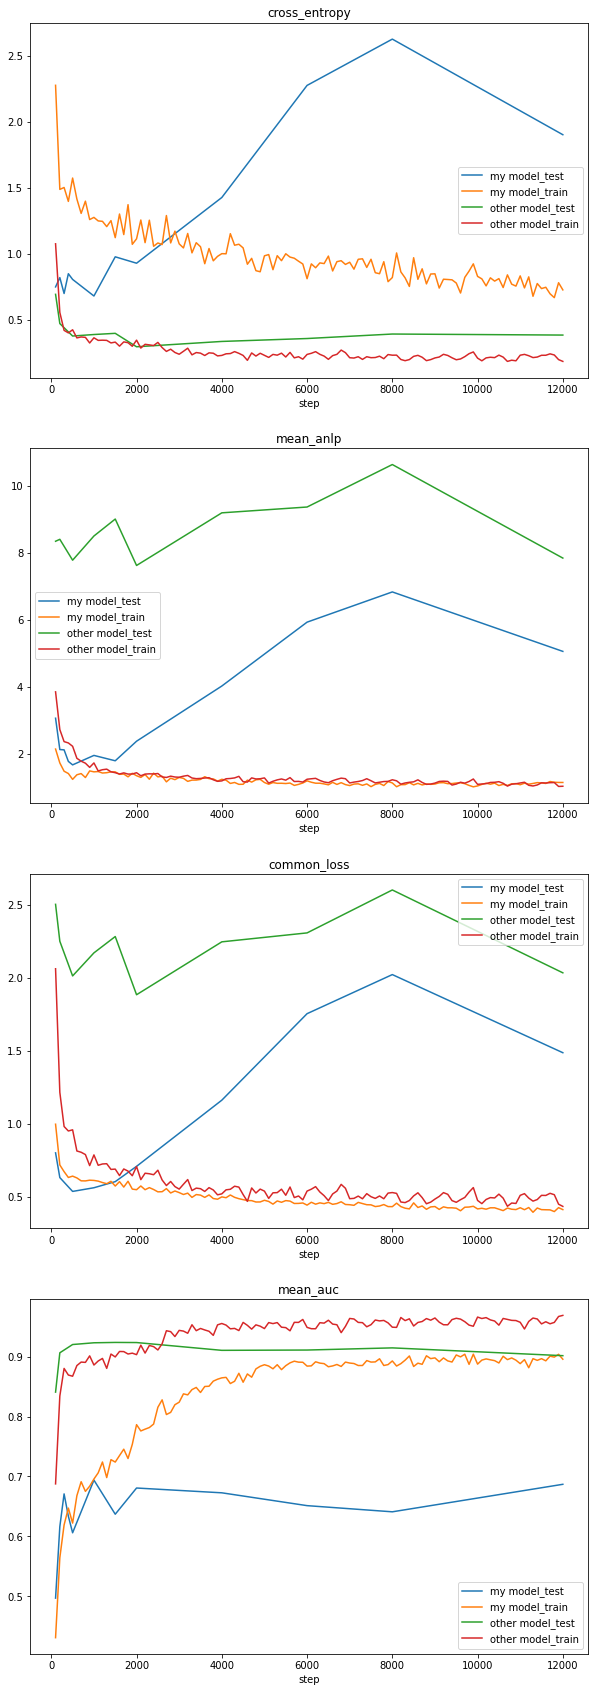

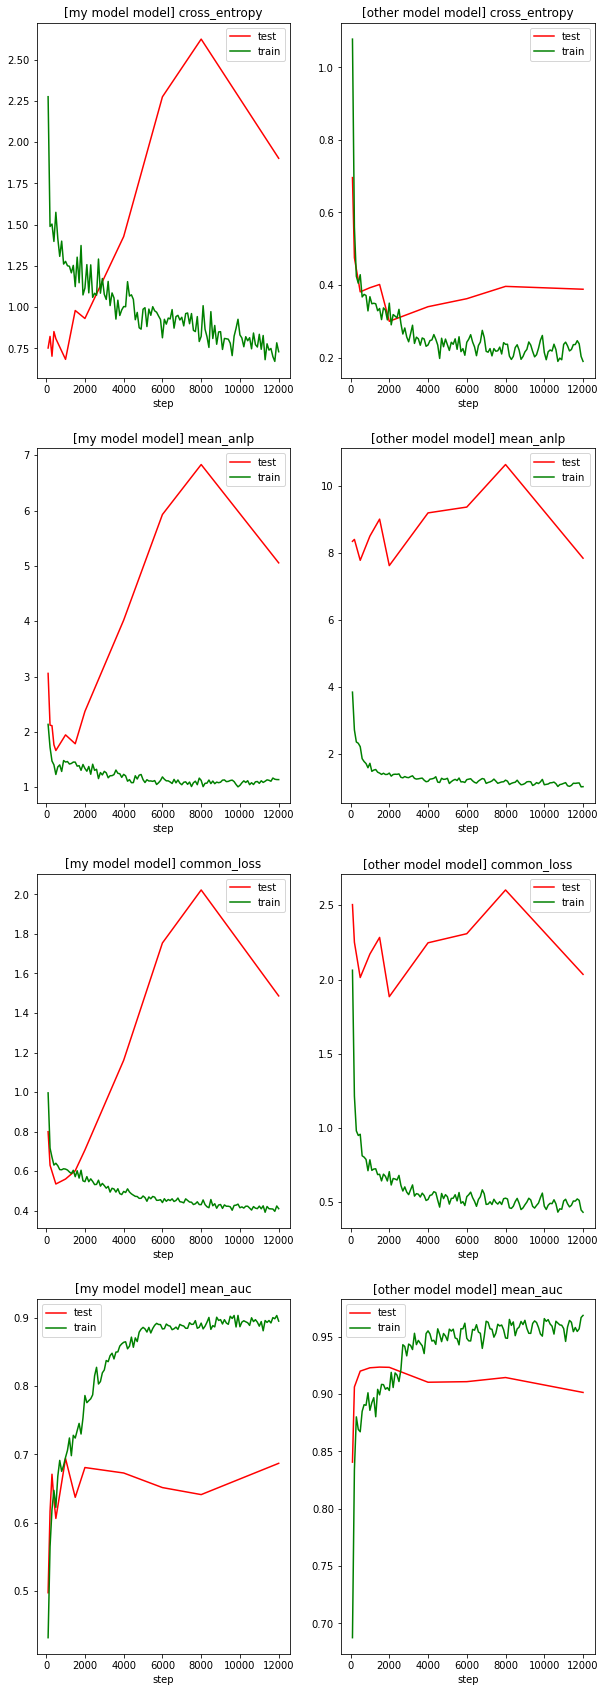

In [23]:
my_model_test_df, my_model_train_df = read_scores(my_model, end_step=12001)
other_model_test_df, other_model_train_df = read_scores(other_model, end_step=12001)

test_scores = [my_model_test_df, other_model_test_df]
train_scores = [my_model_train_df, other_model_train_df]

draw_single_plt(train_scores, test_scores, ['my model', 'other model'])
draw_plt(train_scores, test_scores, ['my model', 'other model'])

### Results from 0.5 to 2 epoch

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


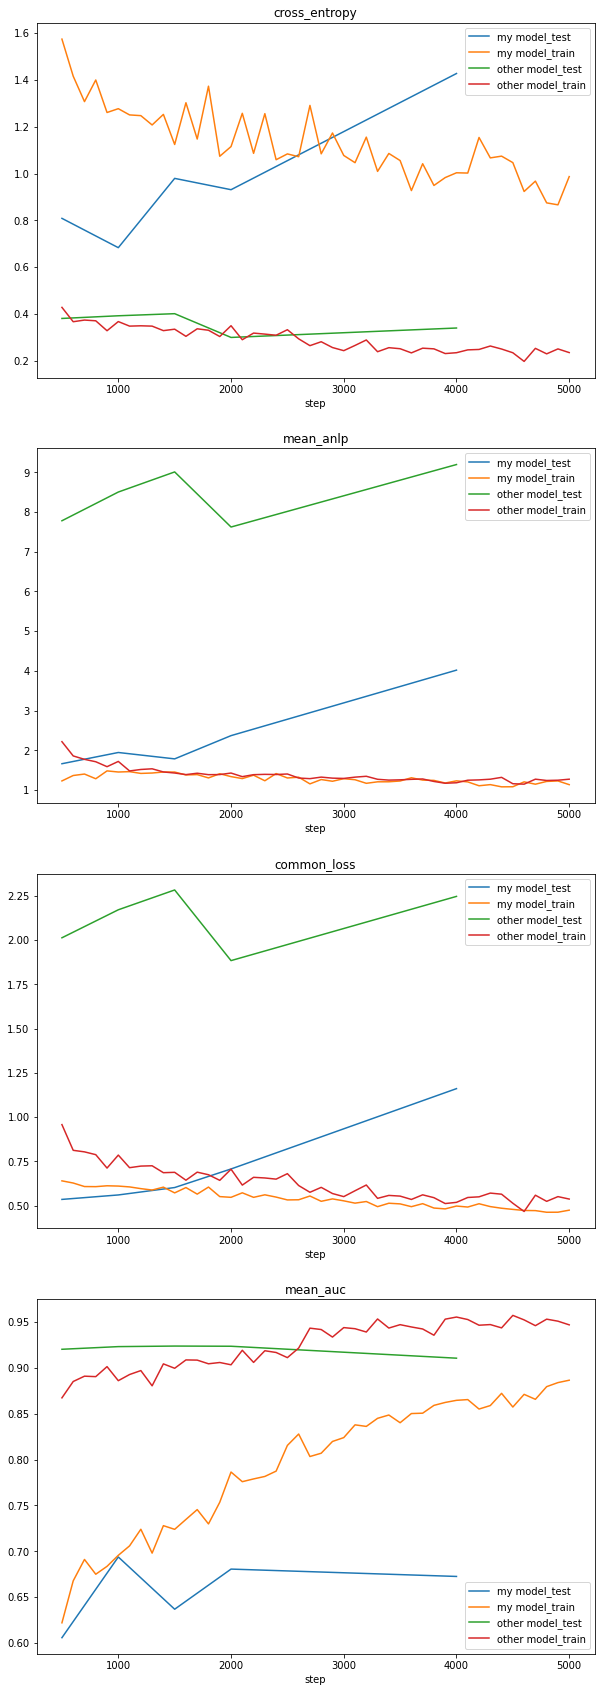

In [24]:
my_model_test_df, my_model_train_df = read_scores(my_model, 500, 5000)
other_model_test_df, other_model_train_df = read_scores(other_model, 500, 5000)

test_scores = [my_model_test_df, other_model_test_df]
train_scores = [my_model_train_df, other_model_train_df]

draw_single_plt(train_scores, test_scores, ['my model', 'other model'])

### All loss vs Anlp vs Cross entpory

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


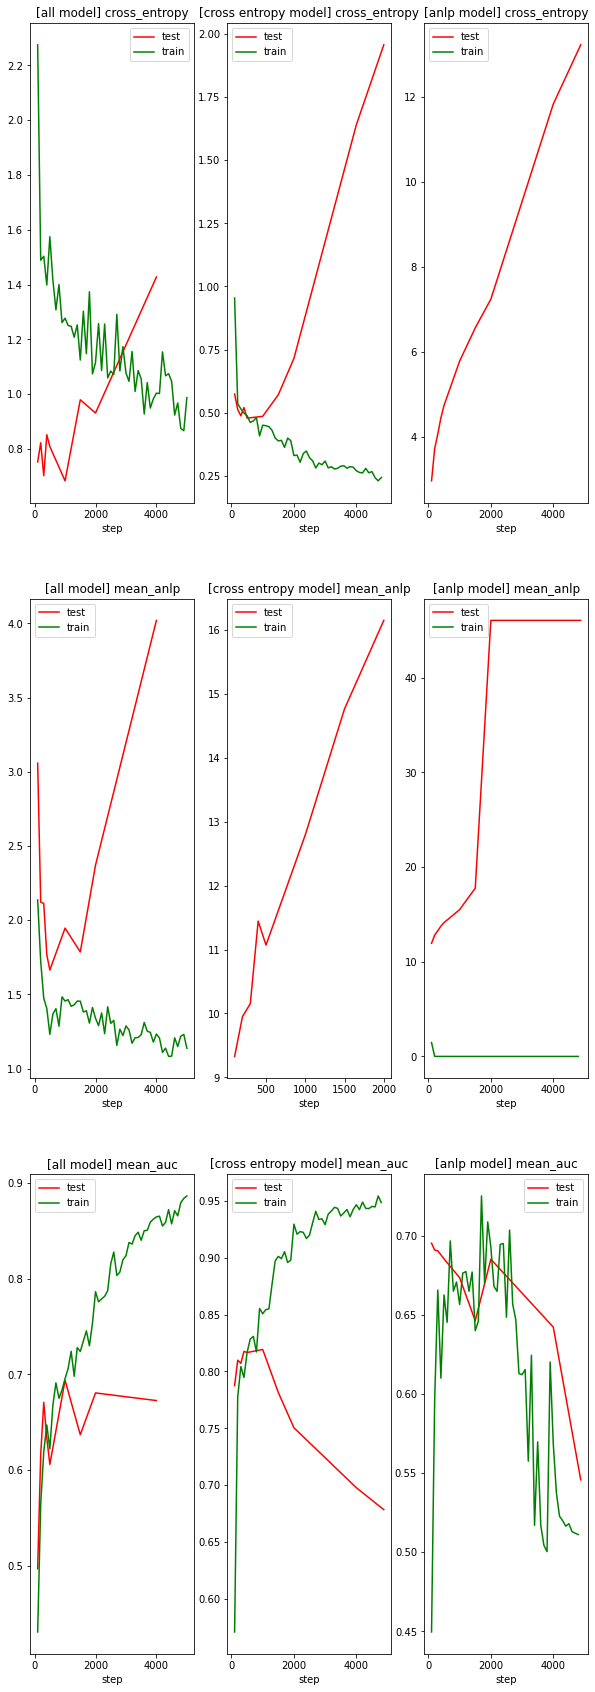

In [25]:
all_losses_test_df, all_losses_train_df = read_scores(my_model, end_step=5000)
cross_entropy_model_test_df, cross_entropy_model_train_df = read_scores(cross_entropy_only, end_step=5000)
anlp_mode_test_df, anlp_mode_train_df = read_scores(anlp_only, end_step=5000)

train_scores = [all_losses_train_df, cross_entropy_model_train_df, anlp_mode_train_df]
test_scores = [all_losses_test_df, cross_entropy_model_test_df, anlp_mode_test_df]

draw_plt(train_scores, test_scores, ['all', 'cross entropy', 'anlp'], ['cross_entropy', 'mean_anlp', 'mean_auc'])

### Alpha = 0.25 Beta= 0.2 vs Alpha = 0.75 Beta = 0.25

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


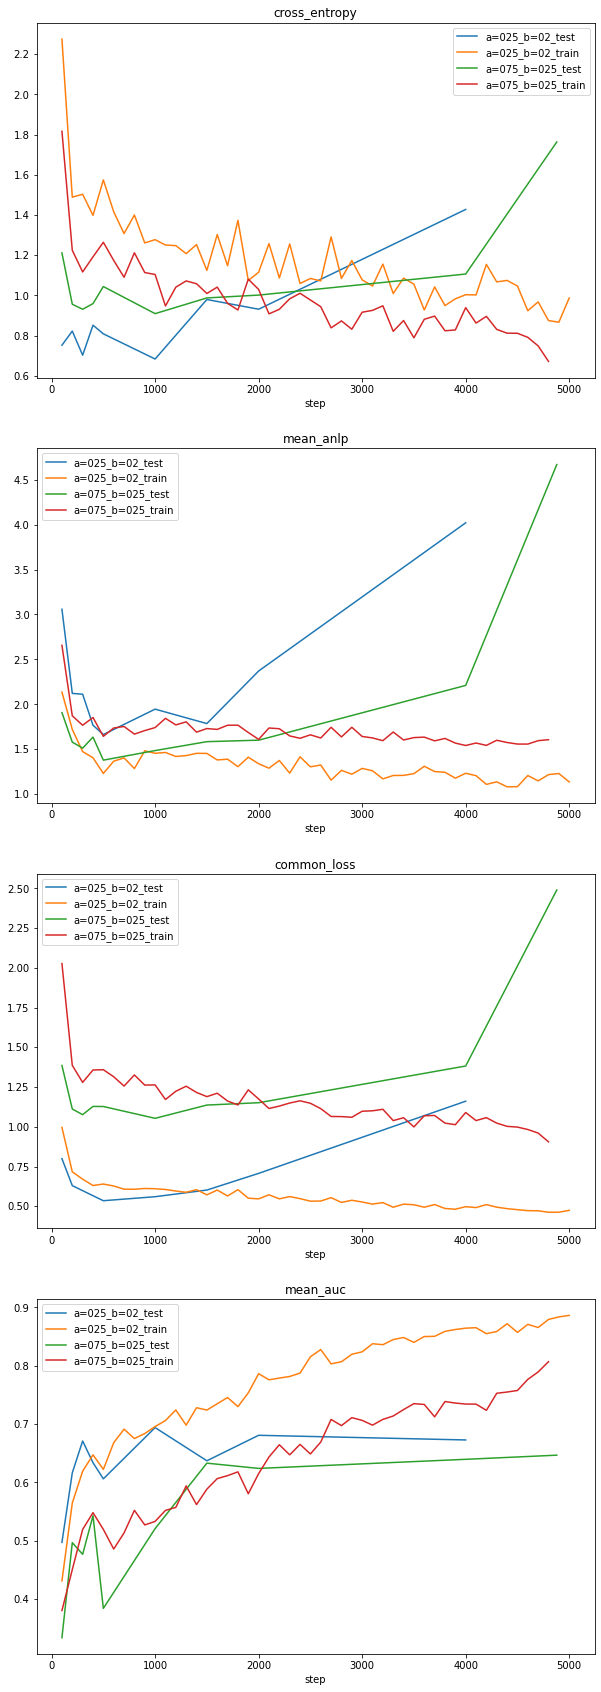

In [26]:
alpha_075_beta_025 = 'dlf_2997_all__20200420_0907.tsv'

my_model_test_df, my_model_train_df = read_scores(my_model, end_step=5000)
other_model_test_df, other_model_train_df = read_scores(alpha_075_beta_025, end_step=5000)

test_scores = [my_model_test_df, other_model_test_df]
train_scores = [my_model_train_df, other_model_train_df]

draw_single_plt(train_scores, test_scores, ['a=025_b=02', 'a=075_b=025'])

### LR=0.001 vs LR=0.0001

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


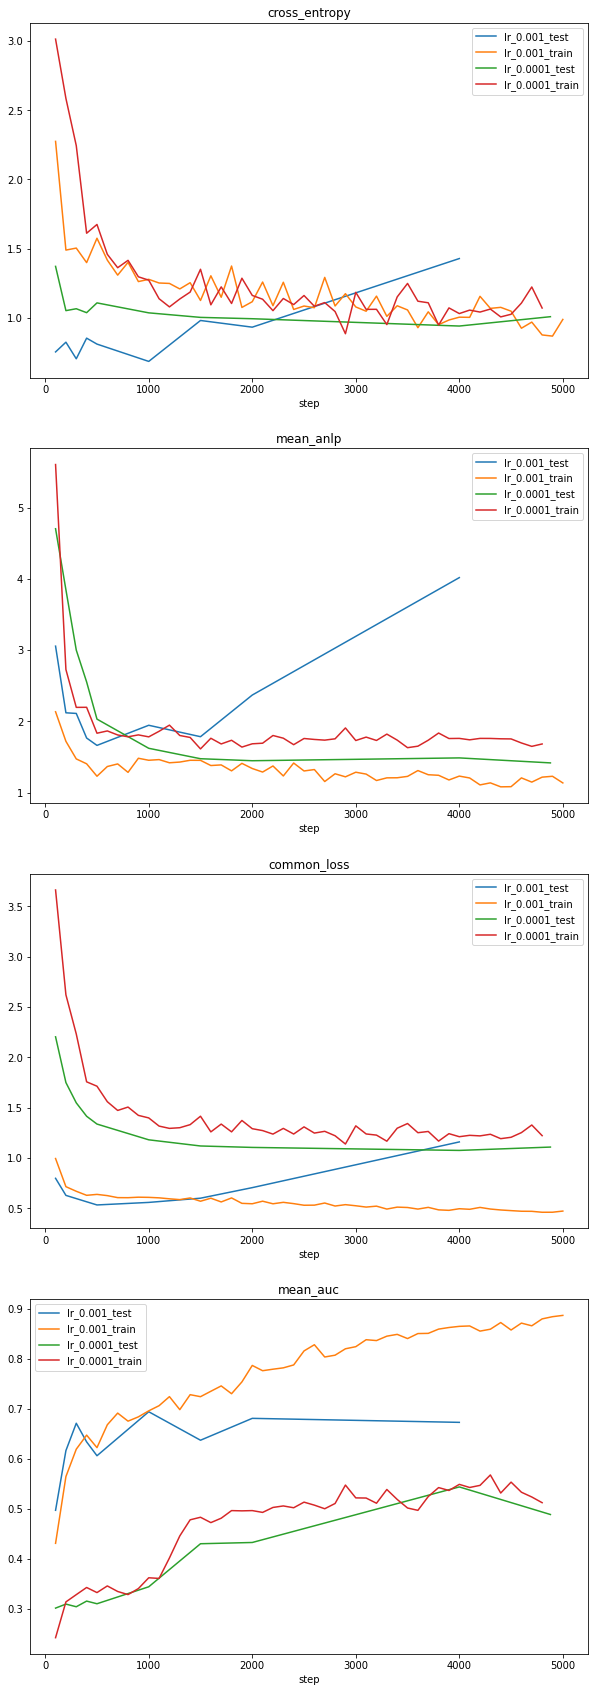

In [27]:
lower_lr = 'dlf_2997_all__20200420_1349.tsv'

my_model_test_df, my_model_train_df = read_scores(my_model, end_step=5000)
other_model_test_df, other_model_train_df = read_scores(lower_lr, end_step=5000)

test_scores = [my_model_test_df, other_model_test_df]
train_scores = [my_model_train_df, other_model_train_df]

draw_single_plt(train_scores, test_scores, ['lr_0.001', 'lr_0.0001'])

### My model LR = 0.0001 vs Other model LR = 0.0001

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


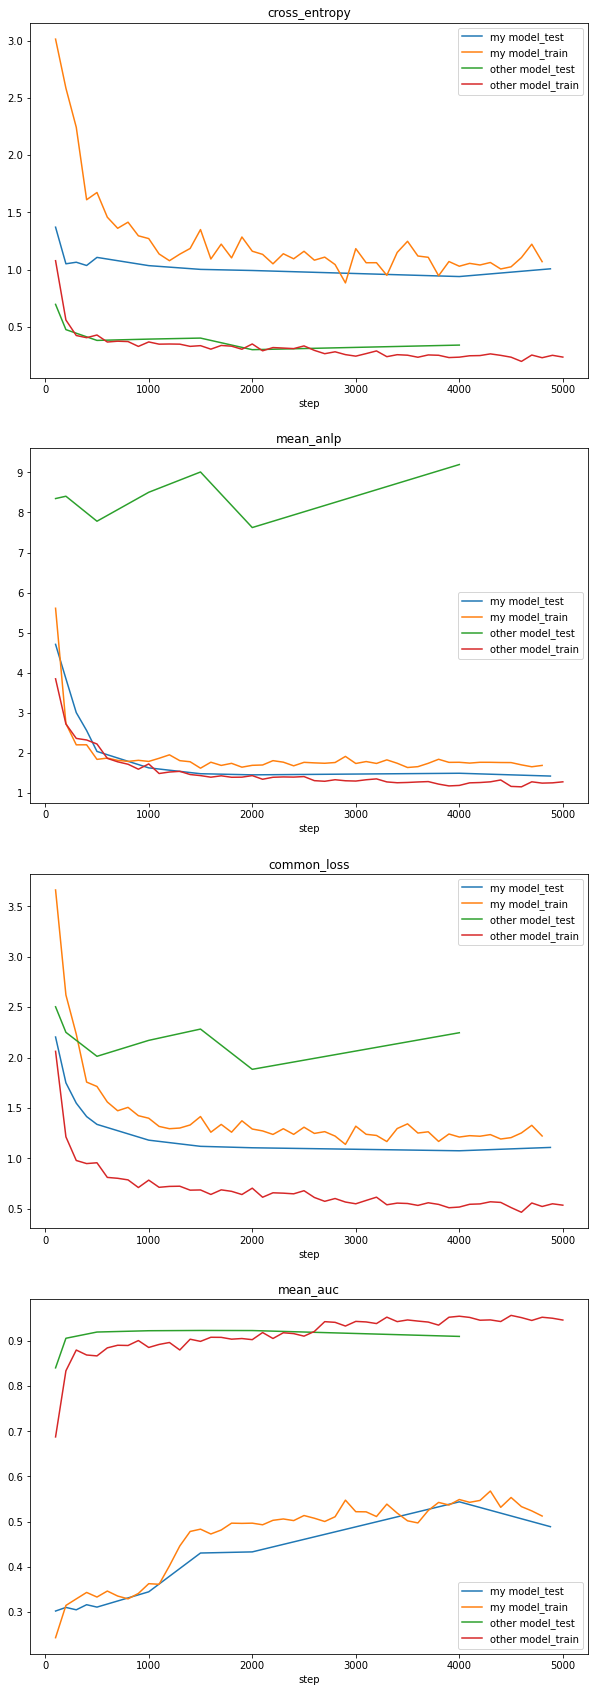

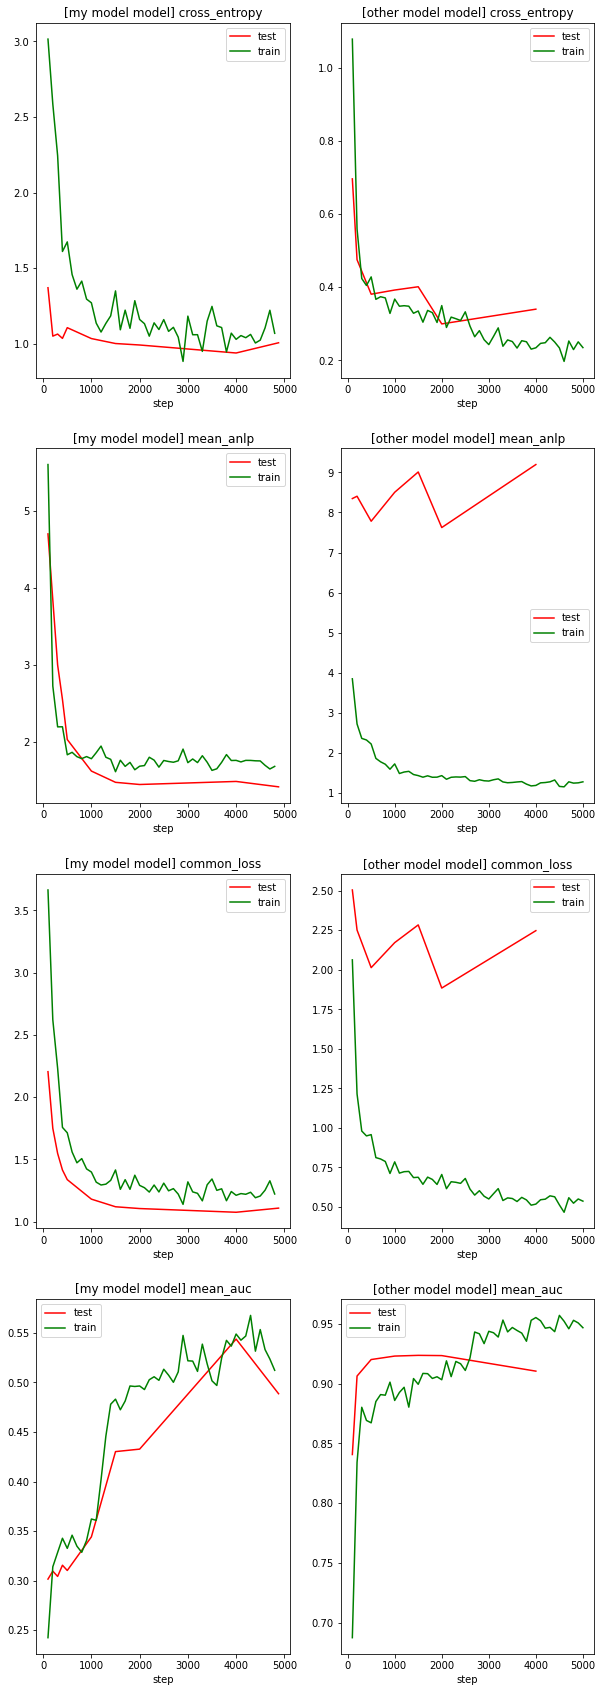

In [28]:
my_model = 'dlf_2997_all__20200420_1349.tsv'

my_model_test_df, my_model_train_df = read_scores(my_model, end_step=5000)
other_model_test_df, other_model_train_df = read_scores(other_model, end_step=5000)

test_scores = [my_model_test_df, other_model_test_df]
train_scores = [my_model_train_df, other_model_train_df]

draw_single_plt(train_scores, test_scores, ['my model', 'other model'])
draw_plt(train_scores, test_scores, ['my model', 'other model'])

## Campaign 3476

In [0]:
my_model = 'dlf_3476_all__20200418_1838.tsv'
my_model_lr_0001 = 'dlf_3476_all__20200420_1701.tsv'
cross_entropy_only = 'dlf_3476_all_cross_entropy_20200419_0153.tsv'
other_model = 'dlf32_128_128_0.000100_0.000100_0.001000_3476_0.25_0.20_True_False_1_1.train.full_log.tsv'

### All training steps

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


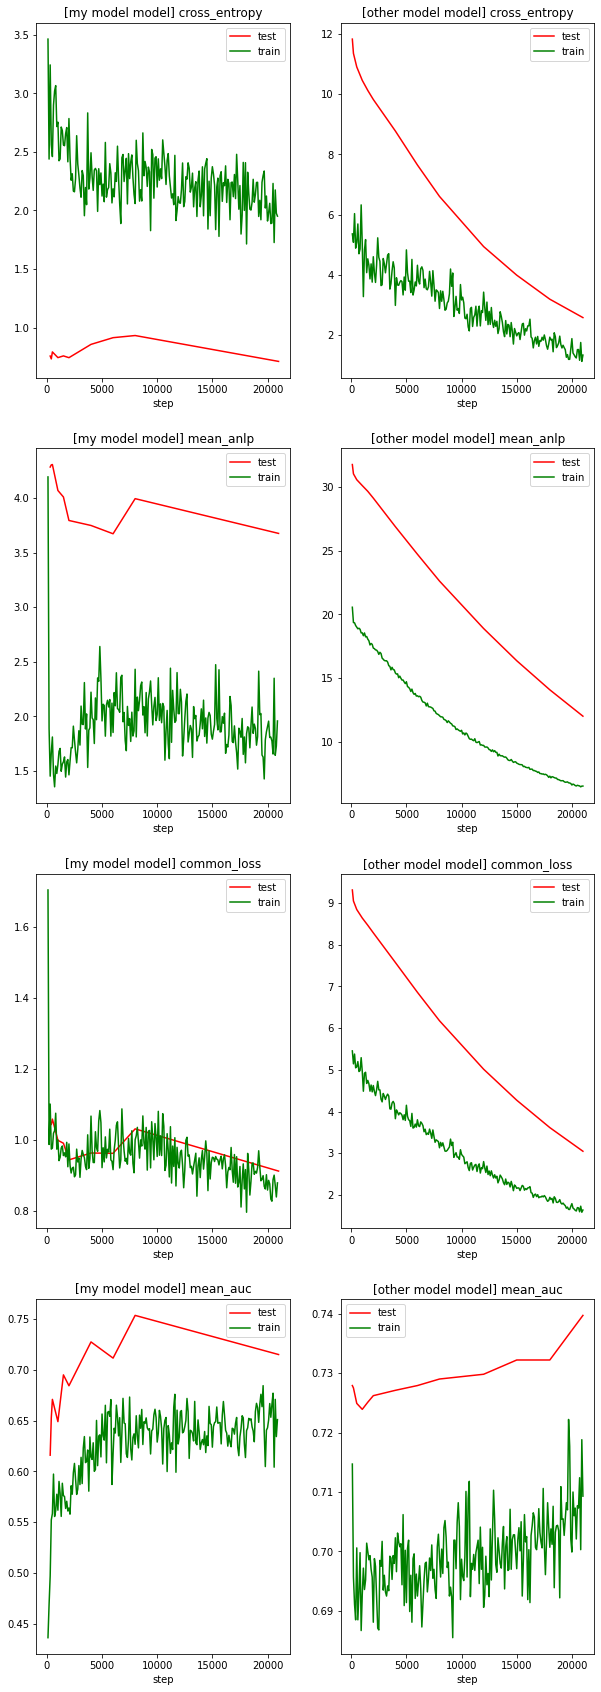

In [30]:
my_model_test_df, my_model_train_df = read_scores(my_model)
other_model_test_df, other_model_train_df = read_scores(other_model)

test_scores = [my_model_test_df, other_model_test_df]
train_scores = [my_model_train_df, other_model_train_df]

draw_plt(train_scores, test_scores, ['my model', 'other model'])

### One difference loss

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


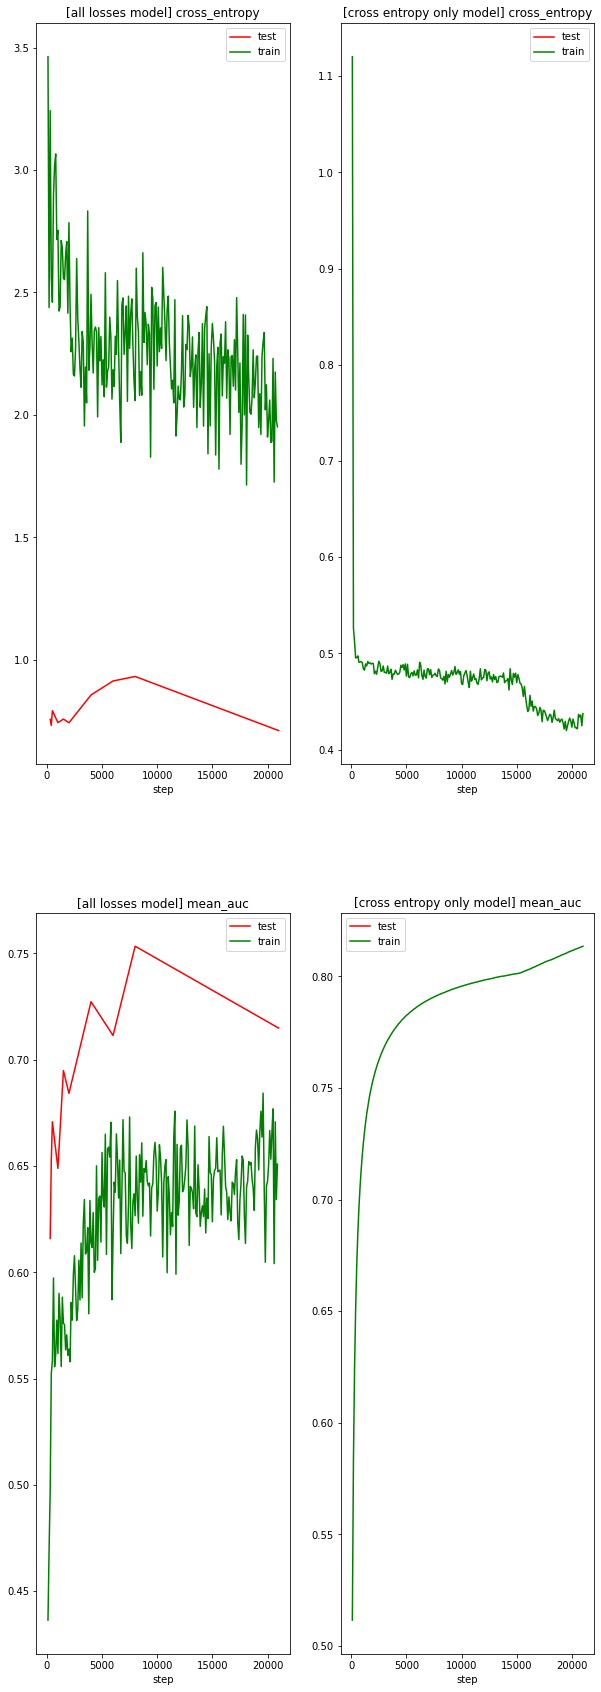

In [31]:
all_losses_test_df, all_losses_train_df = read_scores(my_model)
cross_entropy_model_test_df, cross_entropy_model_train_df = read_scores(cross_entropy_only)

train_scores = [all_losses_train_df, cross_entropy_model_train_df]
test_scores = [all_losses_test_df, cross_entropy_model_test_df]

draw_plt(train_scores, test_scores, ['all losses', 'cross entropy only'], ['cross_entropy', 'mean_auc'])

### My model LR=0.0001

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


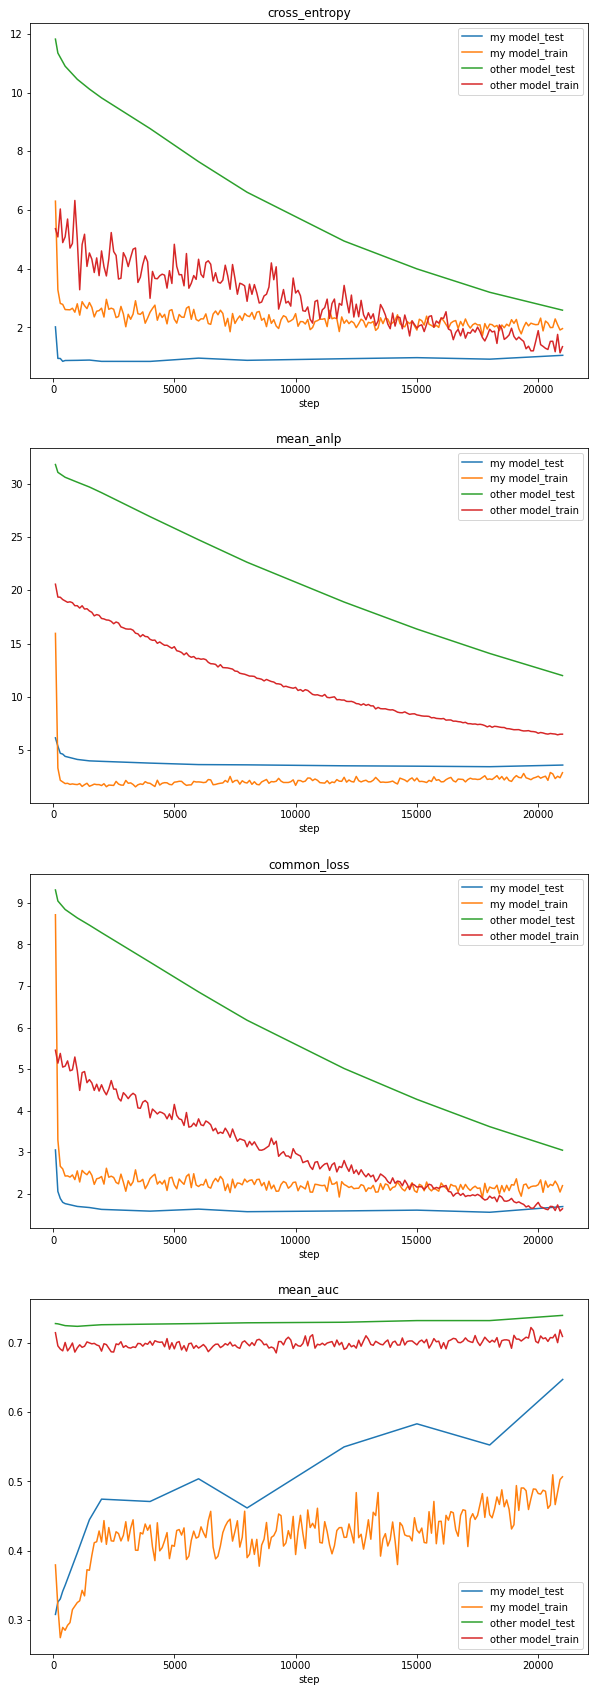

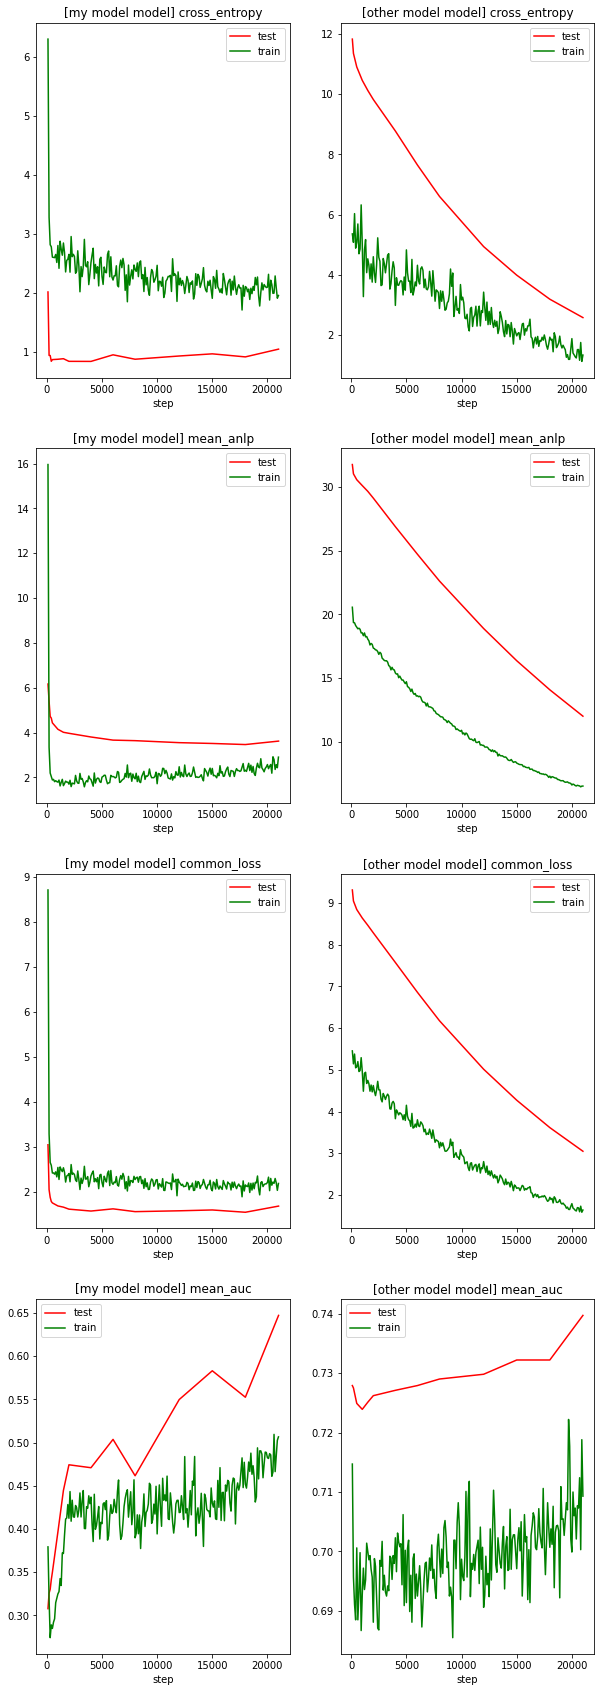

In [33]:
my_model_test_df, my_model_train_df = read_scores(my_model_lr_0001)
other_model_test_df, other_model_train_df = read_scores(other_model)

test_scores = [my_model_test_df, other_model_test_df]
train_scores = [my_model_train_df, other_model_train_df]

draw_single_plt(train_scores, test_scores, ['my model', 'other model'])
draw_plt(train_scores, test_scores, ['my model', 'other model'])

### My model after 0.5 epoch

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


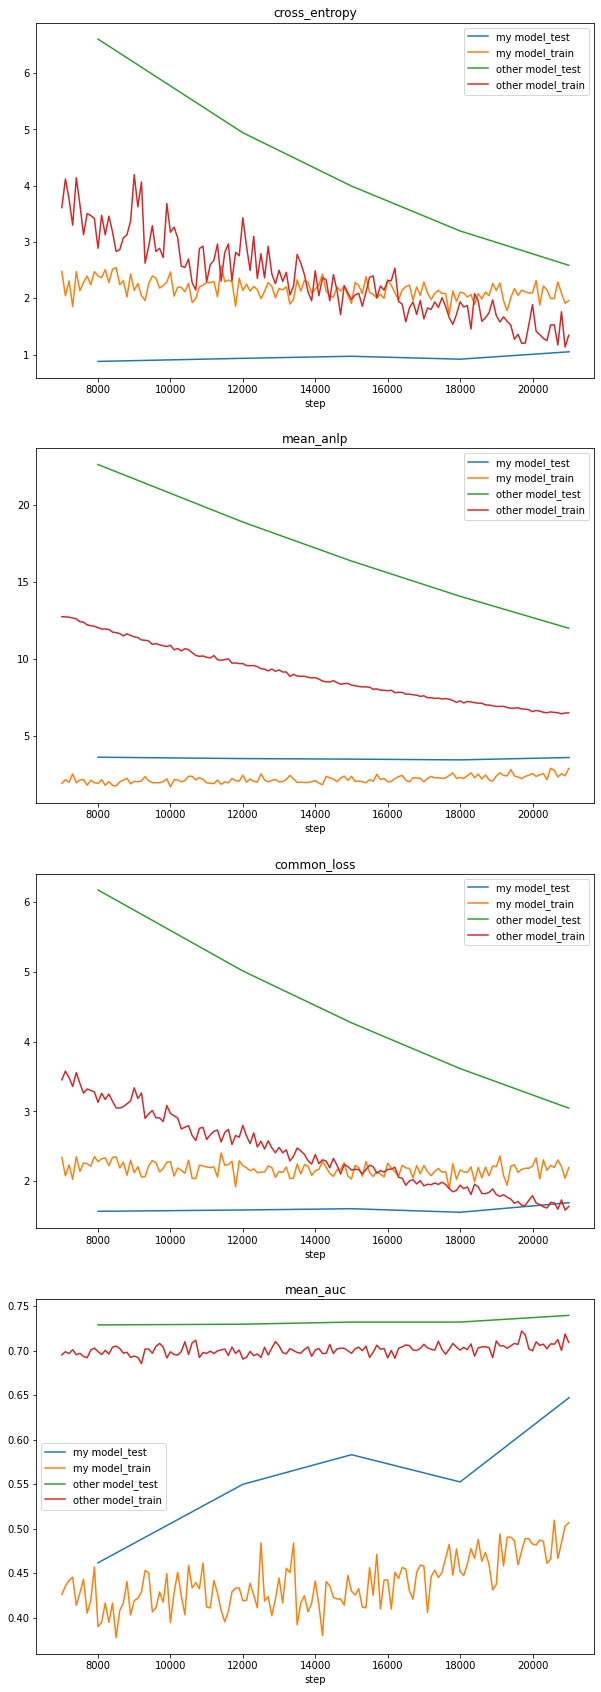

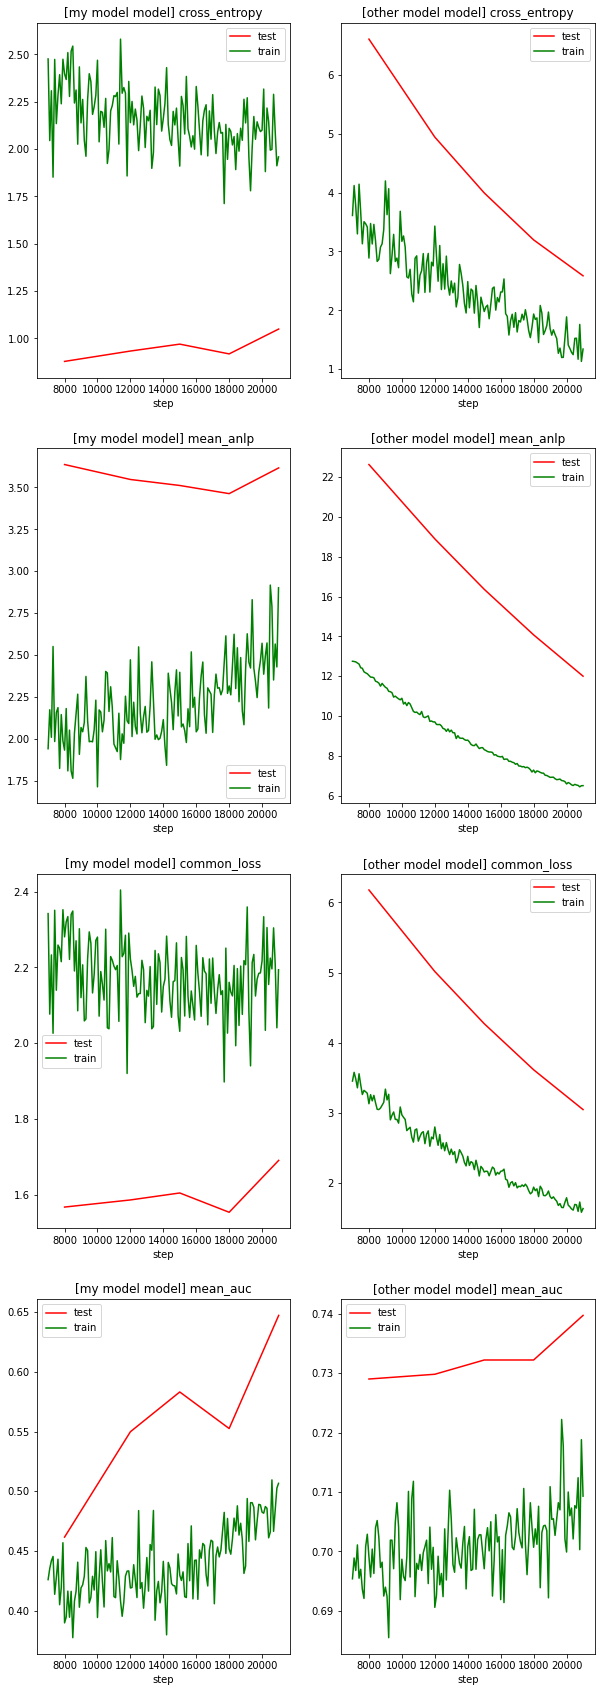

In [36]:
my_model_test_df, my_model_train_df = read_scores(my_model_lr_0001, start_step=7000)
other_model_test_df, other_model_train_df = read_scores(other_model, start_step=7000)

test_scores = [my_model_test_df, other_model_test_df]
train_scores = [my_model_train_df, other_model_train_df]

draw_single_plt(train_scores, test_scores, ['my model', 'other model'])
draw_plt(train_scores, test_scores, ['my model', 'other model'])